## 決定木：過学習に関して

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def arange(a, num):
    """numpy.ndarrayを最小と最大の間でnum+1分割する"""
    amin, amax = a.min(), a.max()
    return np.arange(amin, amax + 1e-8, (amax - amin) / num)


def plot_tree(clf, X, y, num=50, colors=('red', 'blue')):
    """
    X[:, 0]とX[:, 1]の2次元で、yの0-1ラベルによる散布図と
    予測（clf.predict）の等高線（contourf）を描画
    """
    from matplotlib.colors import ListedColormap
    xx0, xx1 = np.meshgrid(arange(X[:, 0], num), arange(X[:, 1], num))
    Z = clf.predict(np.array([xx0.ravel(), xx1.ravel()]).T).reshape(xx0.shape)
    plt.contourf(xx0, xx1, Z, alpha=0.4, cmap=ListedColormap(colors))
    for i in range(2):
        plt.scatter(X[y == i, 0], X[y == i, 1], alpha=0.8, c=colors[i])
    plt.show()

In [3]:
## 1. ノイズを加えたデータの読み込み
df = pd.read_csv('data_add_noise.csv', index_col=0)
df.head(3)

,x0,x1,y
0,6.882114,19.783782,0.0
1,28.853305,12.476423,0.0
2,2.147312,24.028004,0.0


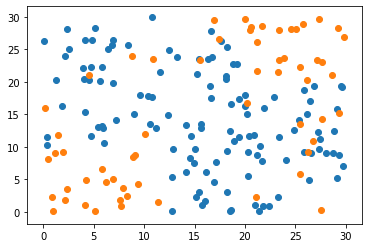

In [4]:
## 2. データのプロット
plt.scatter(df[df.y == 0].x0, df[df.y == 0].x1)
plt.scatter(df[df.y == 1].x0, df[df.y == 1].x1)

In [13]:
## 3. 学習 スコア
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split

(X_train, X_test, b
 y_train, y_test, ) = train_test_split(
    X, y, test_size=0.3, random_state=0 )

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

train = clf.score(X_train, y_train)
test = clf.score(X_test, y_test)

print(f'Train : {train:.3}')
print(f' Test : {test:.3}')

Train : 1.0
 Test : 0.722


### 過学習を起こしている
##### LogisticRegression の  ハイパーパラメーター　C
#### decisionTreeClassifier では　max_depth

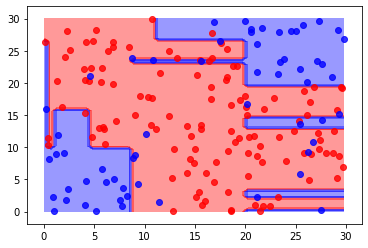

In [15]:
plot_tree(clf, X, y)

### max_depth = 3

In [16]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

train = clf.score(X_train, y_train)
test = clf.score(X_test, y_test)

print(f'Train : {train:.3}')
print(f' Test : {test:.3}')

Train : 0.865
 Test : 0.759


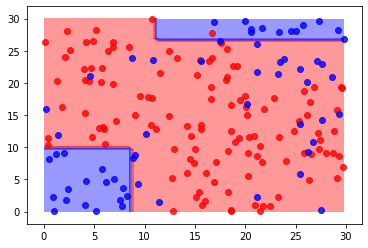

In [17]:
plot_tree(clf, X, y)

### max_depth = 5

In [24]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

train = clf.score(X_train, y_train)
test = clf.score(X_test, y_test)

print(f'Train : {train:.3}')
print(f' Test : {test:.3}')

Train : 0.944
 Test : 0.778


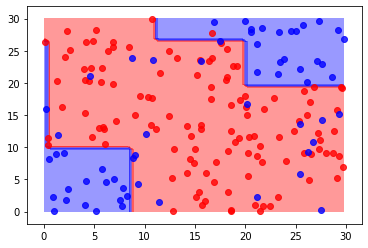

In [25]:
plot_tree(clf, X, y)